(100, 216)
(216, 8)


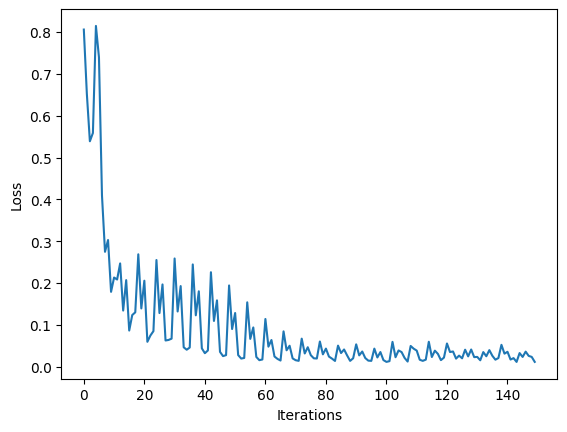

In [ ]:
import scipy.io
import csv
import numpy as np
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

# Load .mat file
mat = scipy.io.loadmat('/content/ovarian_dataset.mat')

# Specify the variable name to convert to CSV
variable_name1 = 'ovarianInputs'
variable_name2 = 'ovarianTargets'
# Get the data from the loaded .mat file
#print(mat)
data1 = mat[variable_name1]
data2 = mat[variable_name2]

# Specify the CSV file name
csv_file_1 = '/content/data_1.csv'
csv_file_2 = '/content/data_2.csv'

# Write the data to CSV
with open(csv_file_1, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    #for row in data1:
    #    csvwriter.writerow(row)
    for idx, row in enumerate(data1):
        csvwriter.writerow(row)

with open(csv_file_2, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    #for row in data1:
    #    csvwriter.writerow(row)
    for idx, row in enumerate(data2):
        csvwriter.writerow(row)

#Reading Data from .csv file
with open('/content/data_1.csv', 'r') as f:
    reader = csv.reader(f)
    data_features = list(reader)

data_features = np.array(data_features,dtype=np.float32)

with open('/content/data_1.csv', 'r') as f:
    reader = csv.reader(f)
    data_labels = list(reader)

data_labels = np.array(data_labels,dtype=np.float32)
#data_labels = data_labels[0,:]
#data_labels = data_labels.reshape((1,data_labels.shape[0]))
#print(data_array.shape)
#print(data_array)



print(data_features.shape)

class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(100, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 8),
        )

        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 9 ==> 784
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(8, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 100),
            #torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


# In[16]:


# Model Initialization
model = AE()

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 0.005,
                             weight_decay = 1e-8)


# In[17]:


epochs = 25
batch_size = 36
outputs = []
losses = []
for epoch in range(epochs):
    for i in range(data_features.shape[1]//batch_size):

      batch = data_features[:,i*batch_size:(i+1)*batch_size]
      # Reshaping the image to (-1, 784)
      #image = image.reshape(-1, 28*28)

      # Output of Autoencoder
      batch = batch.transpose()
      batch = torch.Tensor(batch)
      encoded,reconstructed = model(batch)

      # Calculating the loss function
      #print(reconstructed)
      loss = loss_function(reconstructed, batch)

      # The gradients are set to zero,
      # the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Storing the losses in a list for plotting
      losses.append(loss.detach())
    outputs.append((epochs, batch, reconstructed))

# Defining the Plot Style
#plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses)


# In[18]:


features = torch.Tensor(data_features.transpose())
encoded, _ = model(features)
latent = encoded.detach().numpy()
print(latent.shape)


In [ ]:
# Reconstruct the data using the trained Autoencoder
with torch.no_grad():
    _, reconstructed_data = model(torch.Tensor(data_features.transpose()))

# Convert the reconstructed_data to a NumPy array
reconstructed_data = reconstructed_data.numpy()

# Calculate the MSE between the original and reconstructed data
mse = ((data_features.transpose() - reconstructed_data)**2).mean()

print(f"MSE between original and reconstructed data: {mse}")

MSE between original and reconstructed data: 0.04032338038086891
